In [1]:
import pandas as pd

weather = pd.read_csv("CLMMINT_HKO_.csv")


In [2]:
weather

,Year,Month,Day,TMIN
0,1884,1,1,13.7
1,1884,1,2,14.6
2,1884,1,3,16.2
3,1884,1,4,17.0
4,1884,1,5,13.6
...,...,...,...,...
48907,2024,11,26,18.7
48908,2024,11,27,17.0
48909,2024,11,28,17.0
48910,2024,11,29,16.6


In [3]:
weather.index = weather["Year"].apply(str) + "-" + weather["Month"].apply(str) + "-" + weather["Day"].apply(str)

In [4]:
weather.index

Index(['1884-1-1', '1884-1-2', '1884-1-3', '1884-1-4', '1884-1-5', '1884-1-6',
       '1884-1-7', '1884-1-8', '1884-1-9', '1884-1-10',
       ...
       '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24', '2024-11-25',
       '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29', '2024-11-30'],
      dtype='object', length=48912)

In [5]:
weather

,Year,Month,Day,TMIN
1884-1-1,1884,1,1,13.7
1884-1-2,1884,1,2,14.6
1884-1-3,1884,1,3,16.2
1884-1-4,1884,1,4,17.0
1884-1-5,1884,1,5,13.6
...,...,...,...,...
2024-11-26,2024,11,26,18.7
2024-11-27,2024,11,27,17.0
2024-11-28,2024,11,28,17.0
2024-11-29,2024,11,29,16.6


In [6]:
weather.index = pd.to_datetime(weather.index)

In [7]:
weather.index

DatetimeIndex(['1884-01-01', '1884-01-02', '1884-01-03', '1884-01-04',
               '1884-01-05', '1884-01-06', '1884-01-07', '1884-01-08',
               '1884-01-09', '1884-01-10',
               ...
               '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30'],
              dtype='datetime64[ns]', length=48912, freq=None)

In [8]:
weather.index.year

Index([1884, 1884, 1884, 1884, 1884, 1884, 1884, 1884, 1884, 1884,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', length=48912)

In [9]:
weather.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='int32', length=48912)

In [10]:
weather.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
      dtype='int32', length=48912)

In [11]:
weather.index.year.value_counts().sort_index()

1884    366
1885    365
1886    365
1887    365
1888    366
       ... 
2020    366
2021    365
2022    365
2023    365
2024    335
Name: count, Length: 134, dtype: int64

<Axes: >

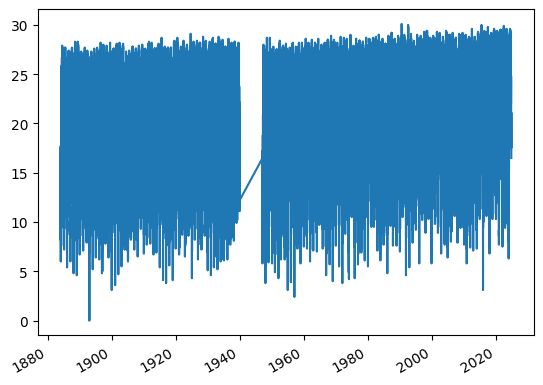

In [12]:
weather["TMIN"].plot()

<Axes: >

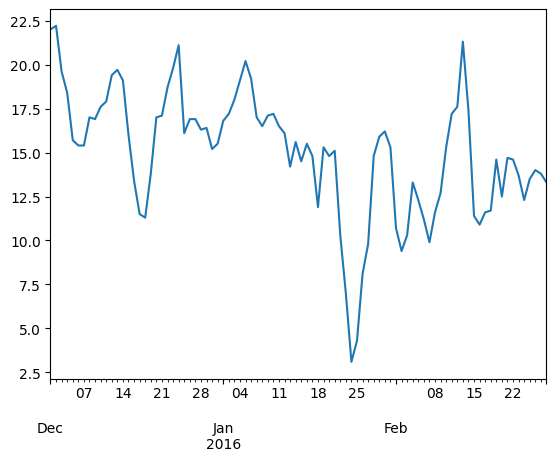

In [16]:
weather.loc["2015-12-01":"2016-02-28"]["TMIN"].plot()

<Axes: >

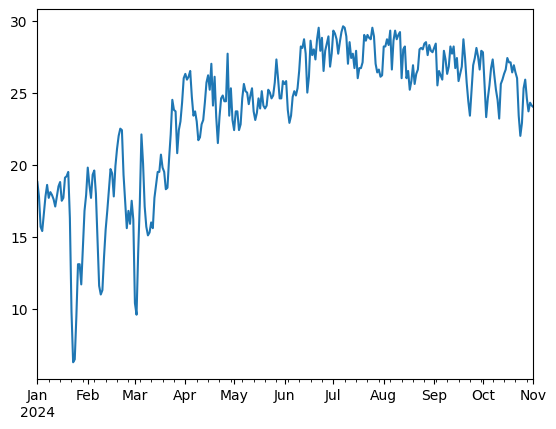

In [18]:
weather.loc["2024-01-01":"2024-11-01"]["TMIN"].plot()

In [20]:
weather["Target"] = weather.shift(-1)["TMIN"]

In [21]:
weather

,Year,Month,Day,TMIN,Target
1884-01-01,1884,1,1,13.7,14.6
1884-01-02,1884,1,2,14.6,16.2
1884-01-03,1884,1,3,16.2,17.0
1884-01-04,1884,1,4,17.0,13.6
1884-01-05,1884,1,5,13.6,14.6
...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0
2024-11-27,2024,11,27,17.0,17.0
2024-11-28,2024,11,28,17.0,16.6
2024-11-29,2024,11,29,16.6,16.5


In [22]:
weather = weather.ffill()

In [23]:
weather

,Year,Month,Day,TMIN,Target
1884-01-01,1884,1,1,13.7,14.6
1884-01-02,1884,1,2,14.6,16.2
1884-01-03,1884,1,3,16.2,17.0
1884-01-04,1884,1,4,17.0,13.6
1884-01-05,1884,1,5,13.6,14.6
...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0
2024-11-27,2024,11,27,17.0,17.0
2024-11-28,2024,11,28,17.0,16.6
2024-11-29,2024,11,29,16.6,16.5


In [24]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [25]:
predictors = weather.columns[~weather.columns.isin(["Target","Year","Month","Day"])]

In [26]:
predictors

Index(['TMIN'], dtype='object')

In [27]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["Target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test["Target"], preds], axis=1)
        
        combined.columns = ["Actual", "Prediction"]
        combined["Diff"] = (combined["Prediction"] - combined["Actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [28]:
predictions = backtest(weather, rr, predictors)

In [29]:
predictions

,Actual,Prediction,Diff
1893-12-29,11.4,9.984802,1.415198
1893-12-30,10.8,11.717358,0.917358
1893-12-31,16.3,11.139839,5.160161
1894-01-01,16.8,16.433762,0.366238
1894-01-02,15.9,16.915028,1.015028
...,...,...,...
2024-11-26,17.0,18.781180,1.781180
2024-11-27,17.0,17.147687,0.147687
2024-11-28,16.6,17.147687,0.547687
2024-11-29,16.5,16.763335,0.263335


In [30]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["Actual"],predictions["Prediction"])

1.0622482898845502

In [31]:
predictions["Diff"].mean()

np.float64(1.0622482898845502)

In [32]:
def pct_diff(old, new):
    return (new - old)/ old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizon = [3, 14]

for horizon in rolling_horizon:
    for col in ["TMIN"]:
        weather = compute_rolling(weather, horizon, col)

In [33]:
weather

,Year,Month,Day,TMIN,Target,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_14_TMIN,rolling_14_TMIN_pct
1884-01-01,1884,1,1,13.7,14.6,NaN,NaN,NaN,NaN
1884-01-02,1884,1,2,14.6,16.2,NaN,NaN,NaN,NaN
1884-01-03,1884,1,3,16.2,17.0,14.833333,0.092135,NaN,NaN
1884-01-04,1884,1,4,17.0,13.6,15.933333,0.066946,NaN,NaN
1884-01-05,1884,1,5,13.6,14.6,15.600000,-0.128205,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0,19.866667,-0.058725,20.814286,-0.101579
2024-11-27,2024,11,27,17.0,17.0,18.933333,-0.102113,20.371429,-0.165498
2024-11-28,2024,11,28,17.0,16.6,17.566667,-0.032258,19.857143,-0.143885
2024-11-29,2024,11,29,16.6,16.5,16.866667,-0.015810,19.364286,-0.142752


In [34]:
weather = weather.iloc[14:,:]

In [35]:
weather

,Year,Month,Day,TMIN,Target,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_14_TMIN,rolling_14_TMIN_pct
1884-01-15,1884,1,15,16.1,15.1,16.466667,-0.022267,14.328571,0.123629
1884-01-16,1884,1,16,15.1,13.8,16.200000,-0.067901,14.364286,0.051218
1884-01-17,1884,1,17,13.8,14.1,15.000000,-0.080000,14.192857,-0.027680
1884-01-18,1884,1,18,14.1,13.8,14.333333,-0.016279,13.985714,0.008172
1884-01-19,1884,1,19,13.8,14.3,13.900000,-0.007194,14.000000,-0.014286
...,...,...,...,...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0,19.866667,-0.058725,20.814286,-0.101579
2024-11-27,2024,11,27,17.0,17.0,18.933333,-0.102113,20.371429,-0.165498
2024-11-28,2024,11,28,17.0,16.6,17.566667,-0.032258,19.857143,-0.143885
2024-11-29,2024,11,29,16.6,16.5,16.866667,-0.015810,19.364286,-0.142752


In [36]:
weather = weather.fillna(0)

In [37]:
weather

,Year,Month,Day,TMIN,Target,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_14_TMIN,rolling_14_TMIN_pct
1884-01-15,1884,1,15,16.1,15.1,16.466667,-0.022267,14.328571,0.123629
1884-01-16,1884,1,16,15.1,13.8,16.200000,-0.067901,14.364286,0.051218
1884-01-17,1884,1,17,13.8,14.1,15.000000,-0.080000,14.192857,-0.027680
1884-01-18,1884,1,18,14.1,13.8,14.333333,-0.016279,13.985714,0.008172
1884-01-19,1884,1,19,13.8,14.3,13.900000,-0.007194,14.000000,-0.014286
...,...,...,...,...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0,19.866667,-0.058725,20.814286,-0.101579
2024-11-27,2024,11,27,17.0,17.0,18.933333,-0.102113,20.371429,-0.165498
2024-11-28,2024,11,28,17.0,16.6,17.566667,-0.032258,19.857143,-0.143885
2024-11-29,2024,11,29,16.6,16.5,16.866667,-0.015810,19.364286,-0.142752


In [38]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMIN"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year,group_keys=False).apply(expand_mean)

In [39]:
weather

,Year,Month,Day,TMIN,Target,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_14_TMIN,rolling_14_TMIN_pct,month_avg_TMIN,day_avg_TMIN
1884-01-15,1884,1,15,16.1,15.1,16.466667,-0.022267,14.328571,0.123629,16.100000,16.100000
1884-01-16,1884,1,16,15.1,13.8,16.200000,-0.067901,14.364286,0.051218,15.600000,15.100000
1884-01-17,1884,1,17,13.8,14.1,15.000000,-0.080000,14.192857,-0.027680,15.000000,13.800000
1884-01-18,1884,1,18,14.1,13.8,14.333333,-0.016279,13.985714,0.008172,14.775000,14.100000
1884-01-19,1884,1,19,13.8,14.3,13.900000,-0.007194,14.000000,-0.014286,14.580000,13.800000
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0,19.866667,-0.058725,20.814286,-0.101579,19.191185,17.574627
2024-11-27,2024,11,27,17.0,17.0,18.933333,-0.102113,20.371429,-0.165498,19.190640,17.079851
2024-11-28,2024,11,28,17.0,16.6,17.566667,-0.032258,19.857143,-0.143885,19.190095,16.883582
2024-11-29,2024,11,29,16.6,16.5,16.866667,-0.015810,19.364286,-0.142752,19.189450,16.758209


In [40]:
predictors = weather.columns[~weather.columns.isin(["Target","Year","Month","Day"])]


In [41]:
predictors

Index(['TMIN', 'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_14_TMIN',
       'rolling_14_TMIN_pct', 'month_avg_TMIN', 'day_avg_TMIN'],
      dtype='object')

In [42]:
predictions = backtest(weather, rr, predictors)

In [43]:
mean_absolute_error(predictions["Actual"],predictions["Prediction"])

1.0253675105448918

In [44]:
predictions.sort_values("Diff", ascending=False)

,Actual,Prediction,Diff
1987-11-27,10.8,21.577800,10.777800
1916-01-22,5.4,16.061050,10.661050
2005-03-11,9.8,19.623998,9.823998
2010-02-11,11.9,21.595393,9.695393
2002-12-07,11.8,21.422968,9.622968
...,...,...,...
1919-12-25,14.7,14.700159,0.000159
2019-10-13,24.2,24.200048,0.000048
1990-07-18,27.2,27.200041,0.000041
1905-05-09,22.4,22.399967,0.000033


<Axes: xlabel='Diff'>

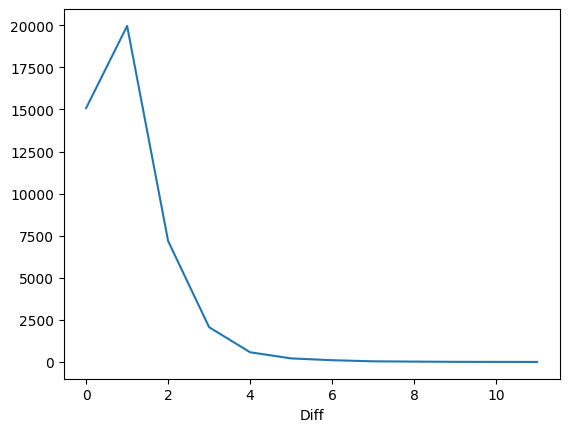

In [45]:
predictions["Diff"].round().value_counts().sort_index().plot()

In [46]:
weather

,Year,Month,Day,TMIN,Target,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_14_TMIN,rolling_14_TMIN_pct,month_avg_TMIN,day_avg_TMIN
1884-01-15,1884,1,15,16.1,15.1,16.466667,-0.022267,14.328571,0.123629,16.100000,16.100000
1884-01-16,1884,1,16,15.1,13.8,16.200000,-0.067901,14.364286,0.051218,15.600000,15.100000
1884-01-17,1884,1,17,13.8,14.1,15.000000,-0.080000,14.192857,-0.027680,15.000000,13.800000
1884-01-18,1884,1,18,14.1,13.8,14.333333,-0.016279,13.985714,0.008172,14.775000,14.100000
1884-01-19,1884,1,19,13.8,14.3,13.900000,-0.007194,14.000000,-0.014286,14.580000,13.800000
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,2024,11,26,18.7,17.0,19.866667,-0.058725,20.814286,-0.101579,19.191185,17.574627
2024-11-27,2024,11,27,17.0,17.0,18.933333,-0.102113,20.371429,-0.165498,19.190640,17.079851
2024-11-28,2024,11,28,17.0,16.6,17.566667,-0.032258,19.857143,-0.143885,19.190095,16.883582
2024-11-29,2024,11,29,16.6,16.5,16.866667,-0.015810,19.364286,-0.142752,19.189450,16.758209


In [47]:
predictions

,Actual,Prediction,Diff
1894-01-12,15.9,15.152609,0.747391
1894-01-13,15.7,15.622709,0.077291
1894-01-14,15.0,14.990804,0.009196
1894-01-15,17.1,14.359586,2.740414
1894-01-16,16.7,16.187888,0.512112
...,...,...,...
2024-11-26,17.0,18.535156,1.535156
2024-11-27,17.0,17.037967,0.037967
2024-11-28,16.6,17.273201,0.673201
2024-11-29,16.5,16.998951,0.498951


<Axes: >

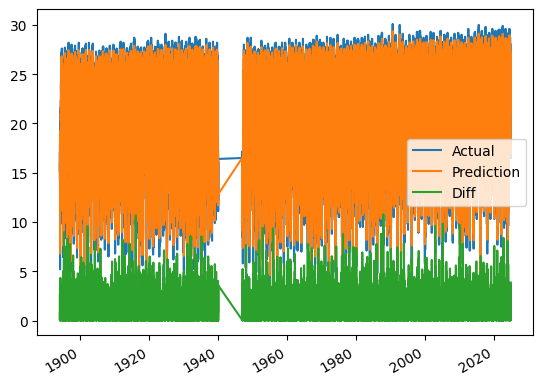

In [48]:
predictions.plot()

<Axes: >

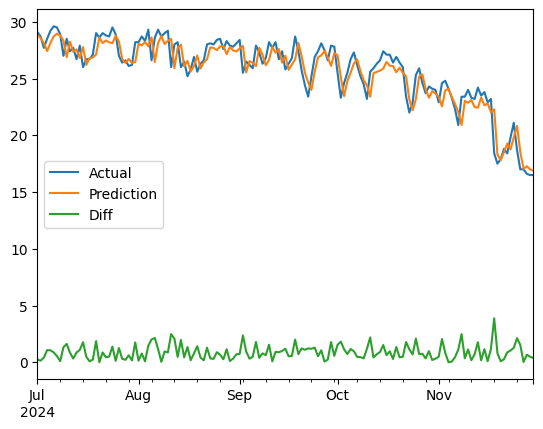

In [49]:
predictions.loc["2024-07-01":"2024-11-30"].plot()